In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

dataDict = np.load('/home/alessio/n-Propagation/datanewoneWithNACnow.npy')[()]
print('npy loaded')
name_data_file = '/home/alessio/n-Propagation/newExtrapolated_gammaExtrExag.pickle'
data = qp.pickleLoad(name_data_file)
print('Pickle loaded')
dataDict.keys(), data.keys()

npy loaded
Pickle loaded


(dict_keys(['nacCUBE', 'thes', 'geoCUBE', 'gams', 'kinCube', 'dipCUBE', 'phis', 'potCube']),
 dict_keys(['gams', 'thes', 'geoCUBE', 'kinCube', 'dipCUBE', 'smoCube', 'phis', 'potCube']))

In [57]:
nac_car_no_mass = dataDict['nacCUBE'][:,:,:,:,:,7:,:]
nac_int = data['smoCube'][15:-15,15:-15,30:-30,:,:,:]
print('{} {}'.format(nac_car_no_mass.shape, nac_int.shape))
25* 26* 100


(25, 26, 100, 8, 8, 8, 3) (25, 26, 100, 8, 8, 3)


65000

In [3]:
#np.amax(nac_car_no_mass),np.amax(nac_int)
maxi = np.amax(nac_car_no_mass)

p,g,t,s1,s2,a,c = np.unravel_index(nac_car_no_mass.argmax(), nac_car_no_mass.shape)
print(p,g,t,s1,s2)
print(np.linalg.norm(nac_int[p,g,t,s1,s2]))
print(np.linalg.norm(nac_car_no_mass[p,g,t,s1,s2]))
60224.3241919/0.0834085454574

13 3 79 4 5
0.0834085454574
60224.3241919


722040.2161629699

In [4]:
umass = 1836

C_mass = 12 * umass
H_mass = 1  * umass

massVector = np.array([C_mass,C_mass,C_mass,C_mass,C_mass,C_mass,C_mass,C_mass,C_mass,C_mass,C_mass,C_mass,H_mass,H_mass,H_mass,H_mass,H_mass,H_mass,H_mass,H_mass,H_mass,H_mass,H_mass,H_mass])
massVector2 = massVector.reshape(8,3)

# this division, incredibly, works as expected. 
# massVector2(8,3) is the same array size that the last 2 dimension of nac_car_no_mass(:,:,:,:,:,8,3).
# This means that they are multiplied ELEMENTWISE, that is exactly what I want to do.

nac_car = nac_car_no_mass / massVector2 


<IPython.core.display.Javascript object>


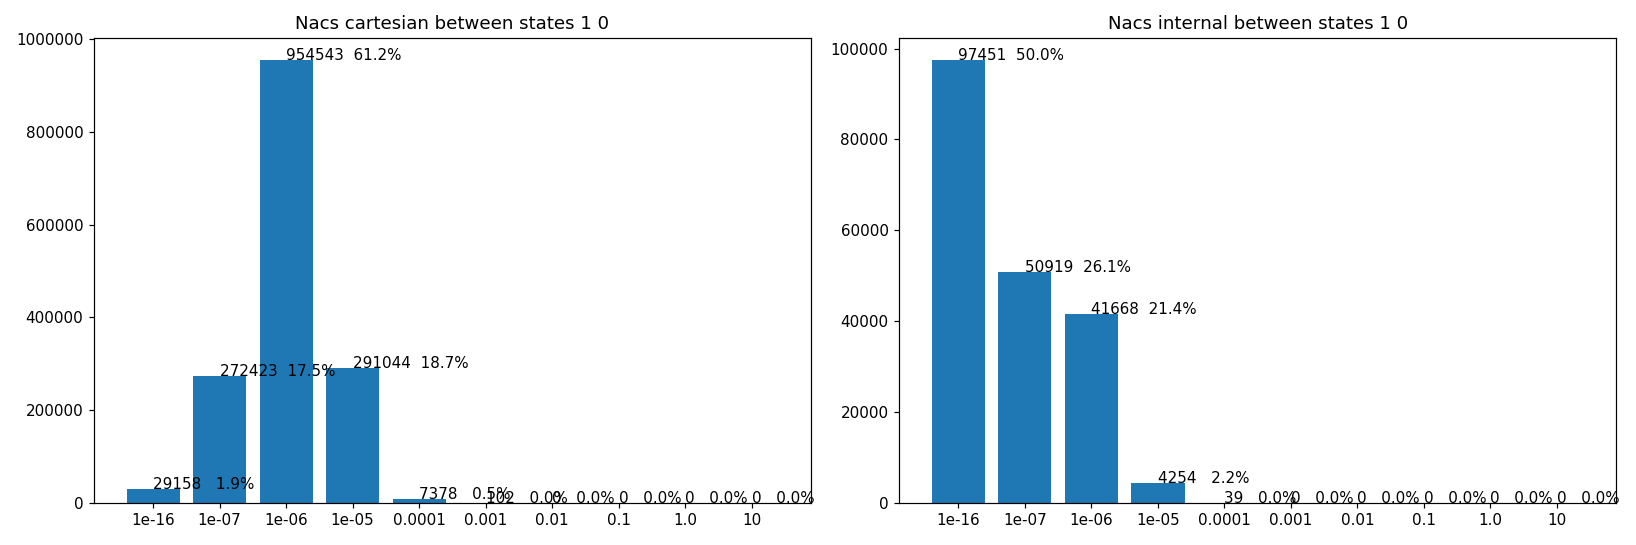

In [5]:
import matplotlib.pyplot as plt
%matplotlib notebook

makeGraph = True

states_to_plot = 2

if makeGraph:
    for s1 in range(states_to_plot):
        for s2 in range(s1):
            
            # INTERNAL
            a = np.abs(nac_int[:,:,:,s1,s2,:].flatten())
            len_a = a.size
            
            # CARTESIAN
            b = np.abs(nac_car[:,:,:,s1,s2,:,:].flatten())
            len_b = b.size
            
            binZ = [0.0000000000000001, 0.0000001, 0.000001, 0.00001,0.0001,0.001,0.01,0.1,1.0,10,1000000000] # last one is not displayed
            # thing here is the integer where I plot the bar (x position)
            thing = np.arange(len(binZ)-1)            
            label_names = [ '{}'.format(x) for x in binZ ]

            
            counts_a, bins_a = np.histogram(a,bins=binZ)
            counts_b, bins_b = np.histogram(b,bins=binZ)

            fig, (ax1,ax0) = plt.subplots(1,2,figsize=(15,5))
            
            ax0.bar(thing,counts_a)
            ax1.bar(thing,counts_b)
     
            for xy in zip(thing, counts_a):
                percentage = (xy[1]/len_a)*100
                ax0.annotate('{} {:5.1f}%'.format(xy[1],percentage), xy=xy)
            for xy in zip(thing, counts_b):
                percentage = (xy[1]/len_b)*100
                ax1.annotate('{} {:5.1f}%'.format(xy[1],percentage), xy=xy)


            ax0.set_xticks(thing, minor=False)
            ax0.set_xticklabels(label_names, fontdict=None, minor=False)
            ax0.set_title('Nacs internal between states {} {}'.format(s1,s2))
            
            ax1.set_xticks(thing, minor=False)
            ax1.set_xticklabels(label_names, fontdict=None, minor=False)
            ax1.set_title('Nacs cartesian between states {} {}'.format(s1,s2))
            
            plt.tight_layout()


# Norm product

/home/alessio/config/miniconda/envs/quantumpropagator/lib/python3.5/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


<IPython.core.display.Javascript object>


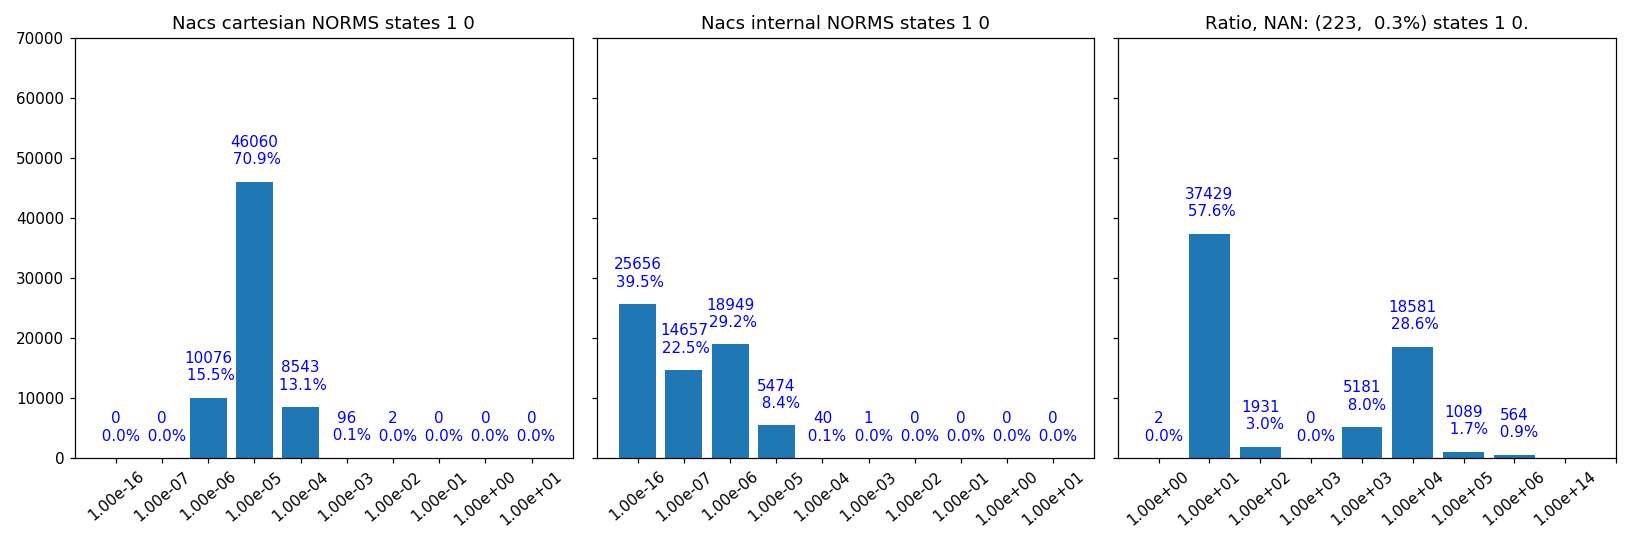

<IPython.core.display.Javascript object>


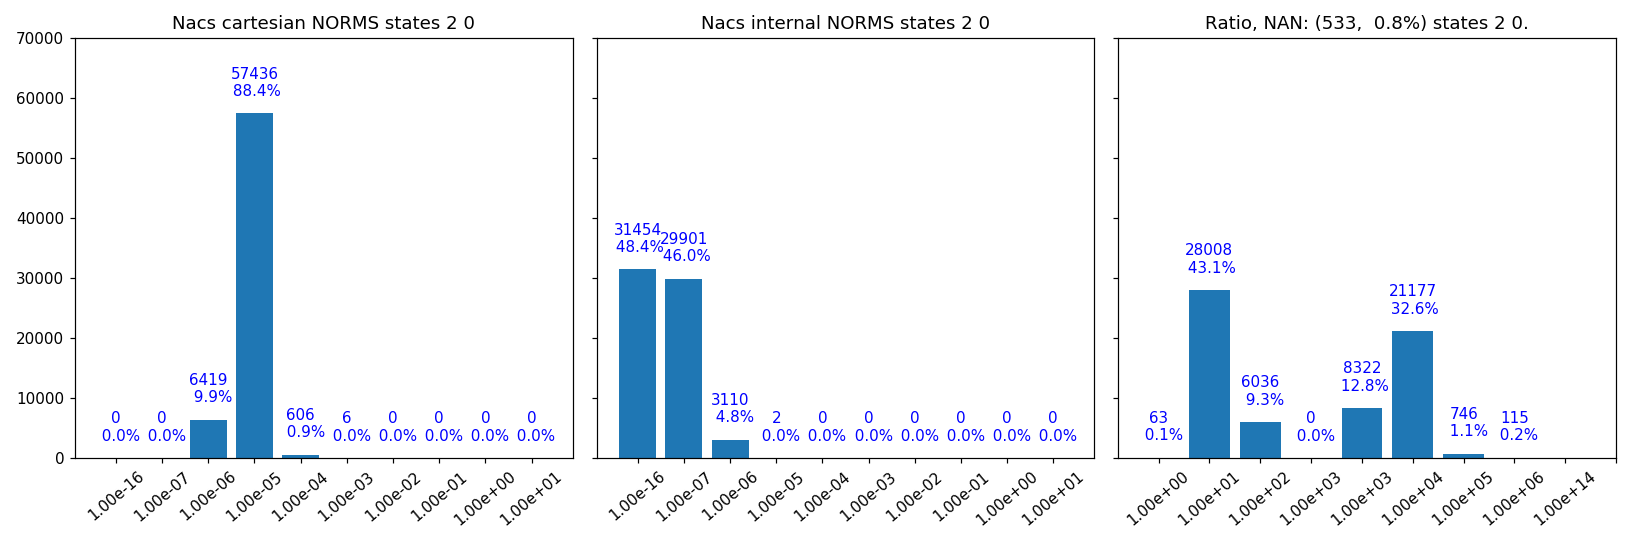

<IPython.core.display.Javascript object>


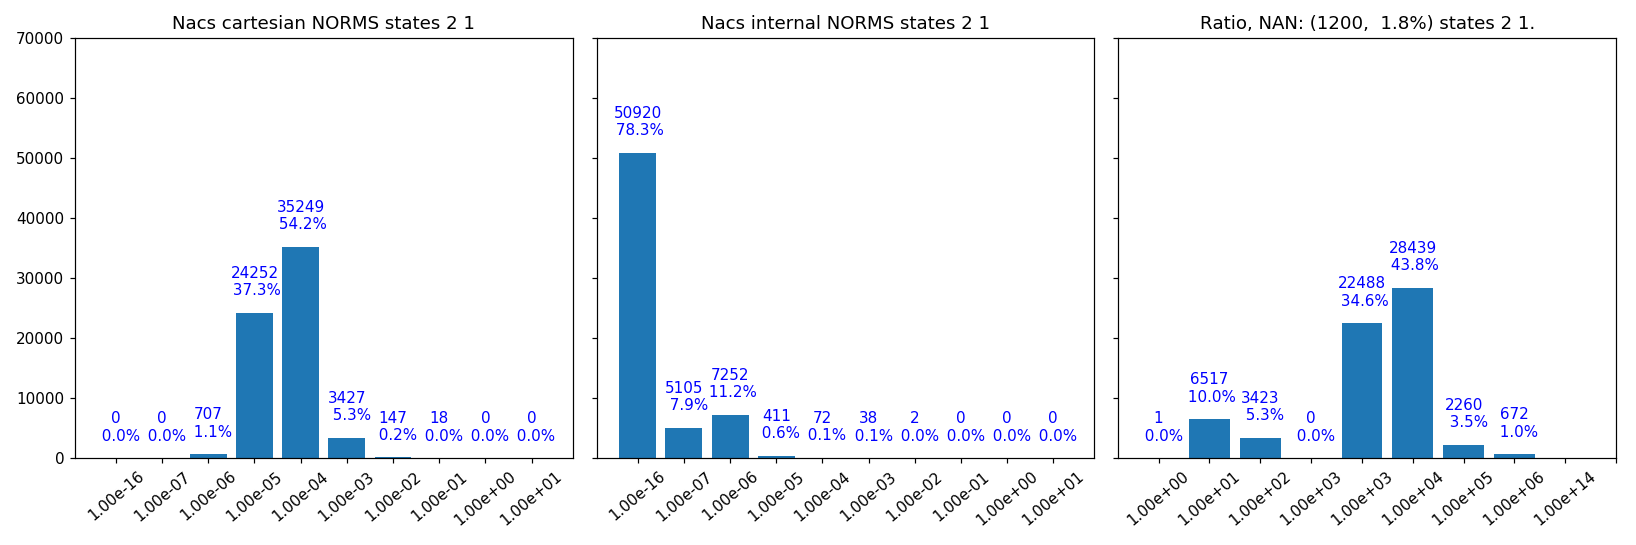

<IPython.core.display.Javascript object>


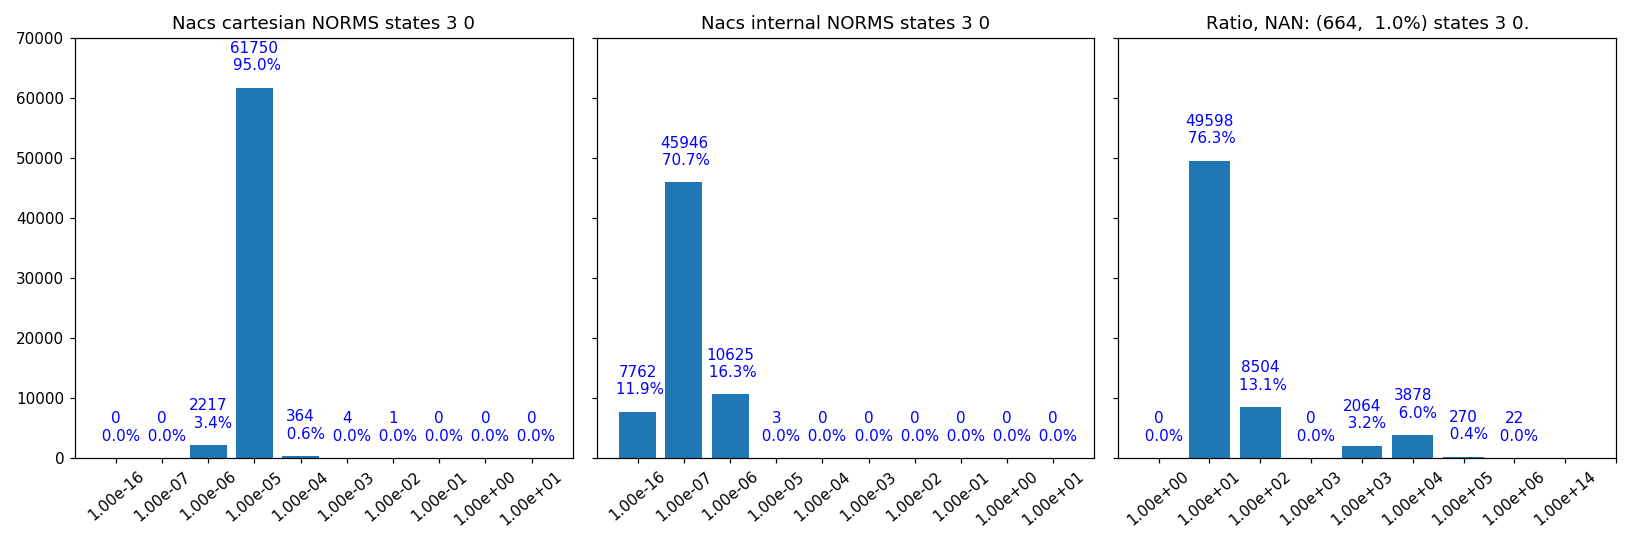

<IPython.core.display.Javascript object>


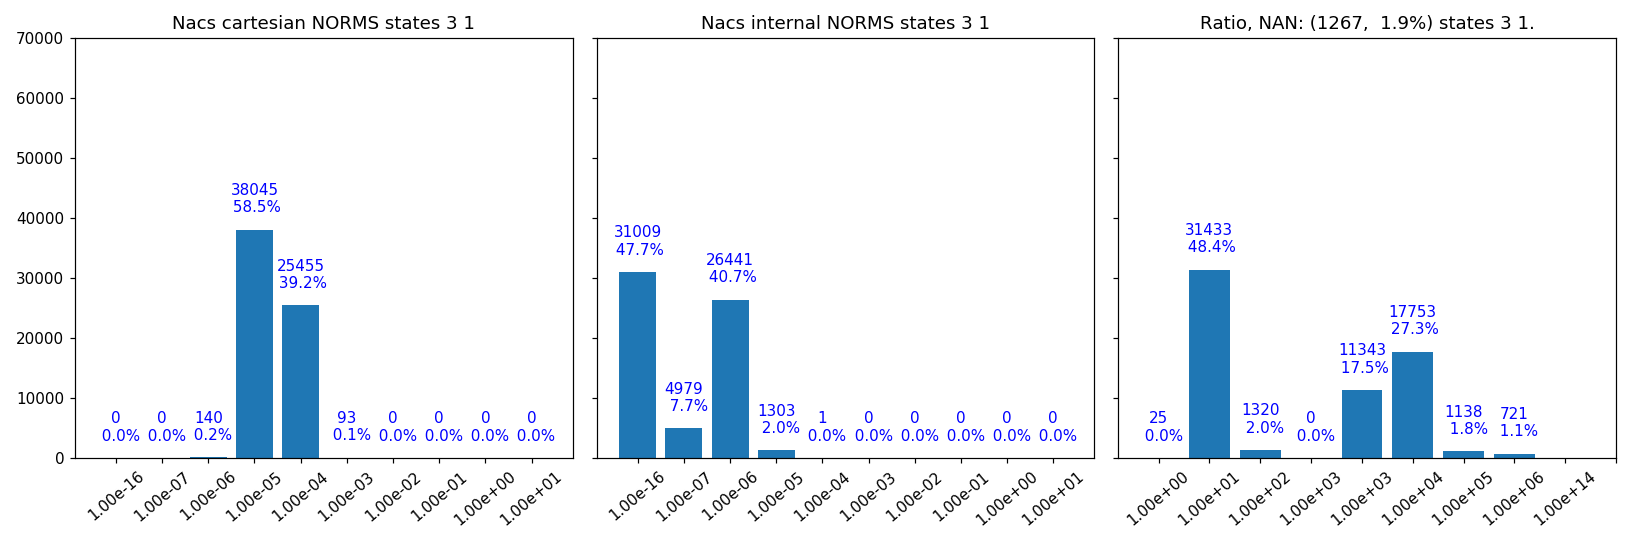

<IPython.core.display.Javascript object>


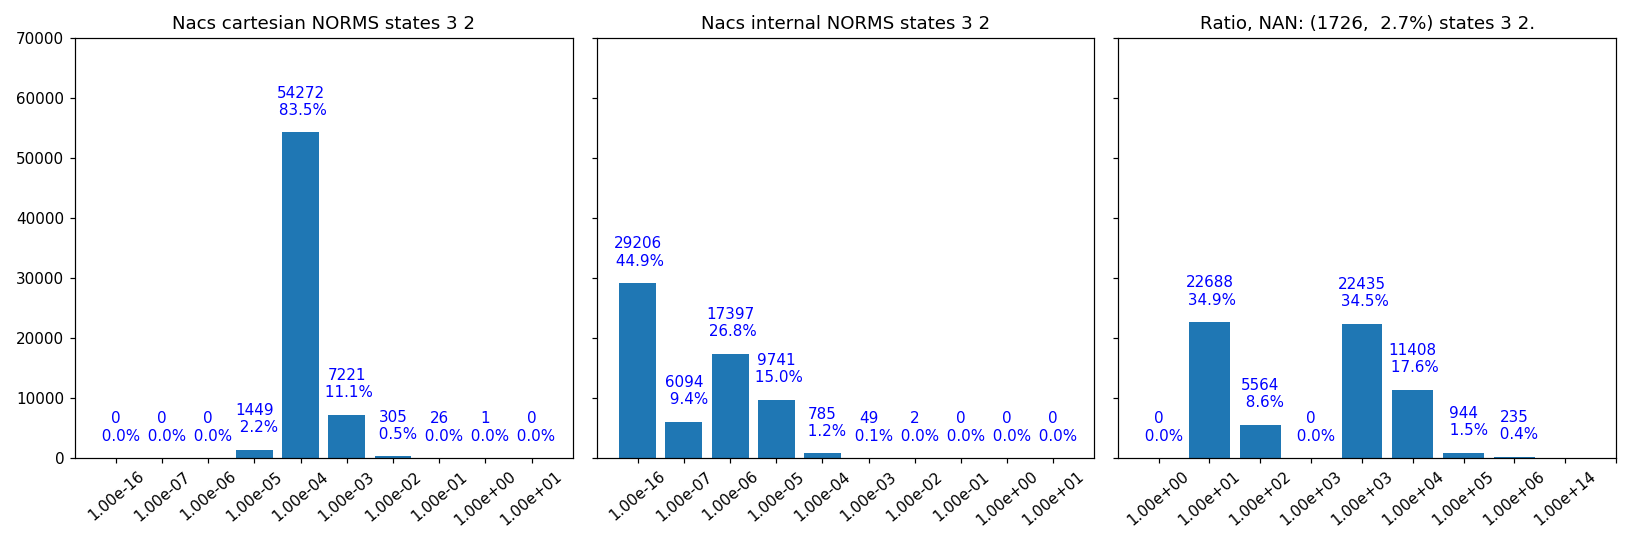

<IPython.core.display.Javascript object>


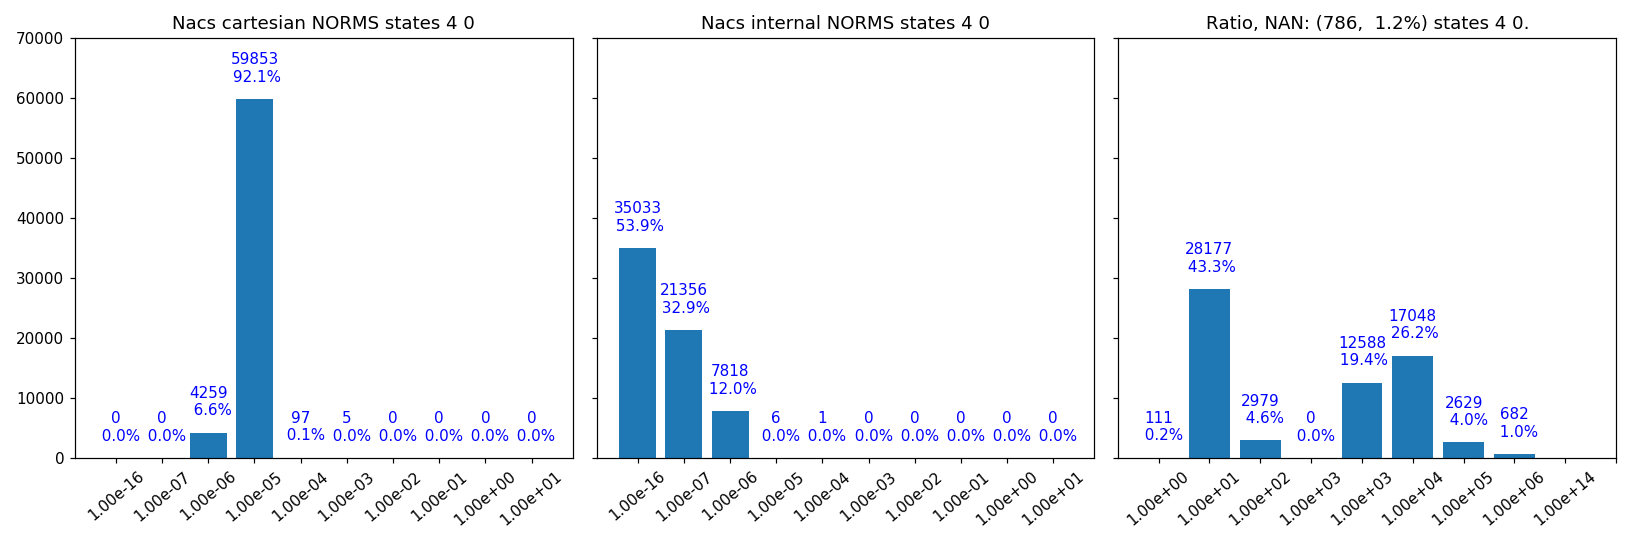

<IPython.core.display.Javascript object>


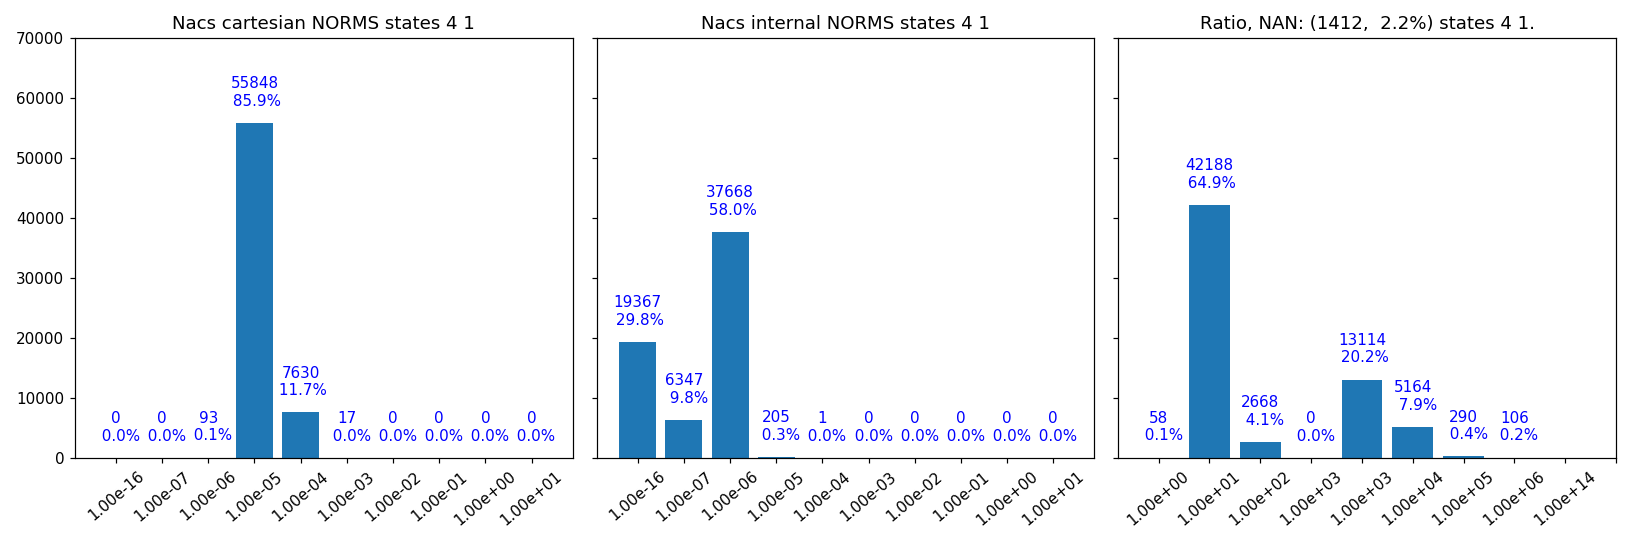

<IPython.core.display.Javascript object>


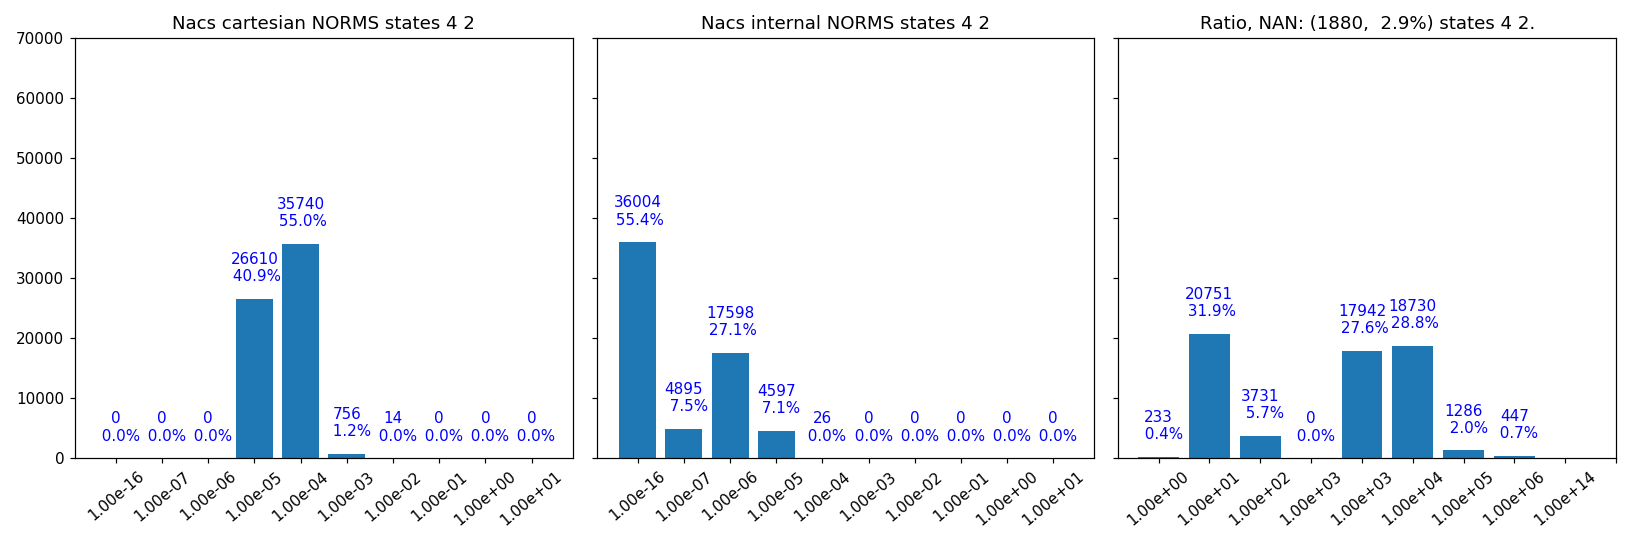

<IPython.core.display.Javascript object>


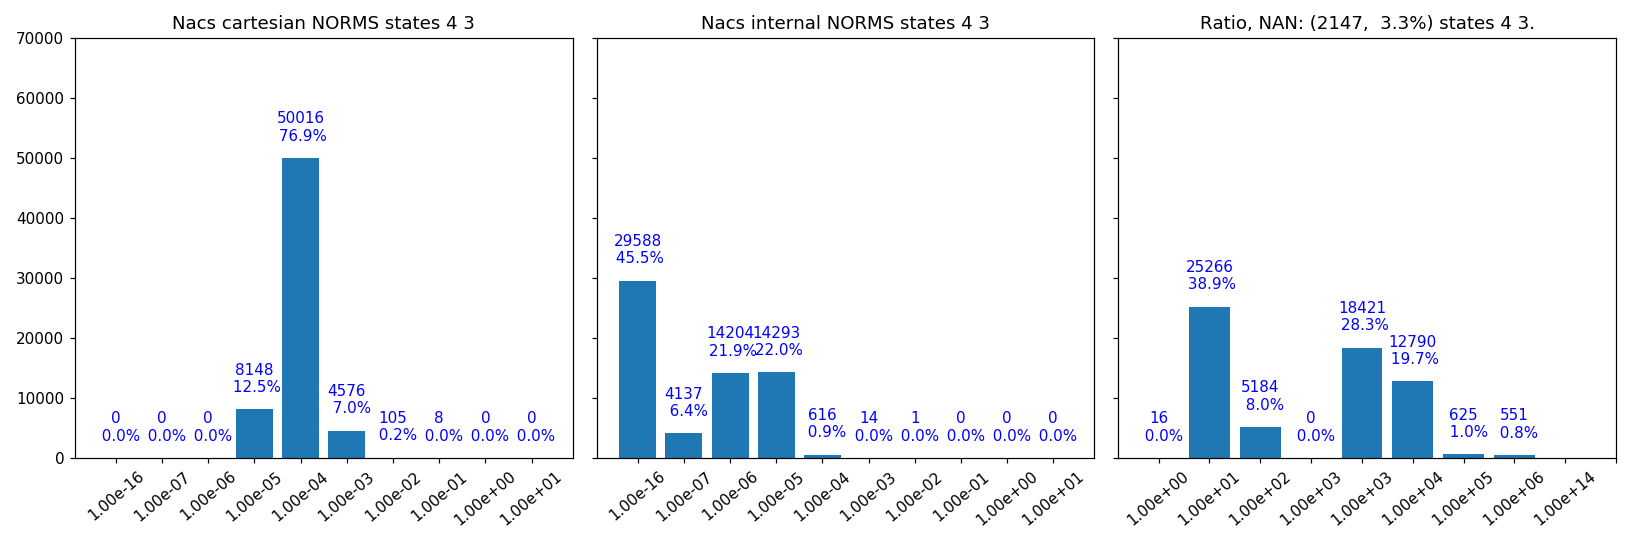

<IPython.core.display.Javascript object>


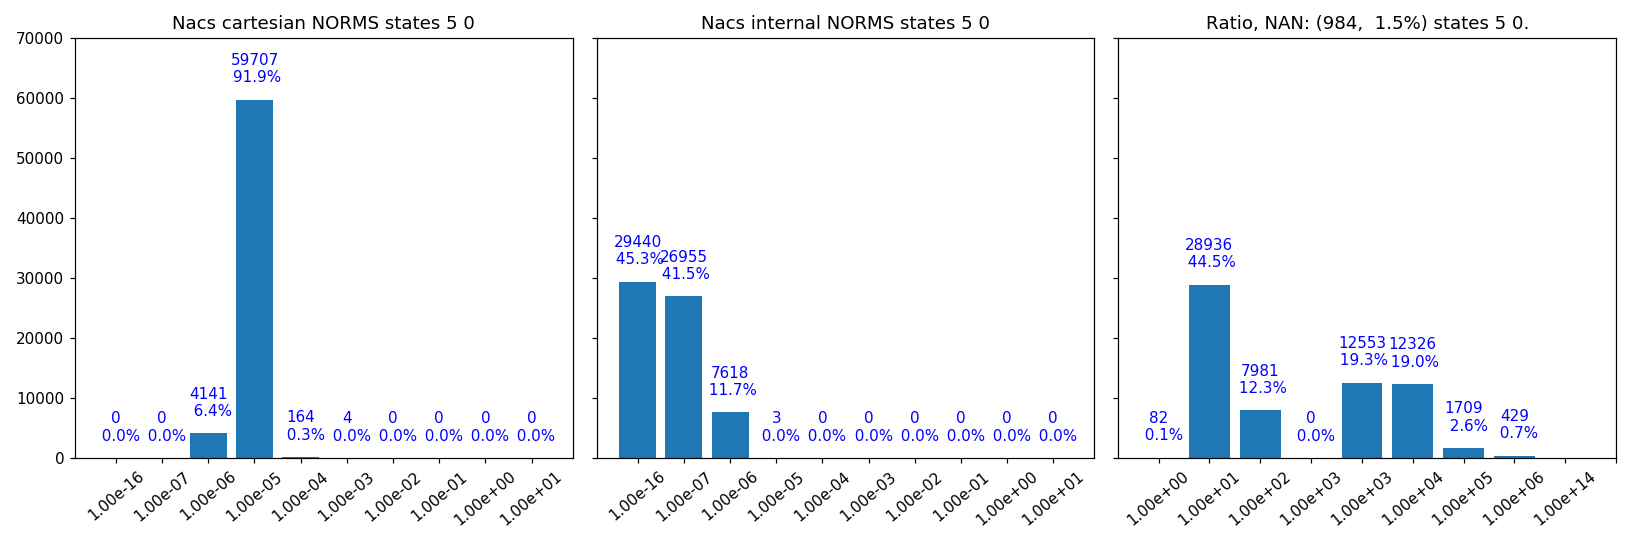

<IPython.core.display.Javascript object>


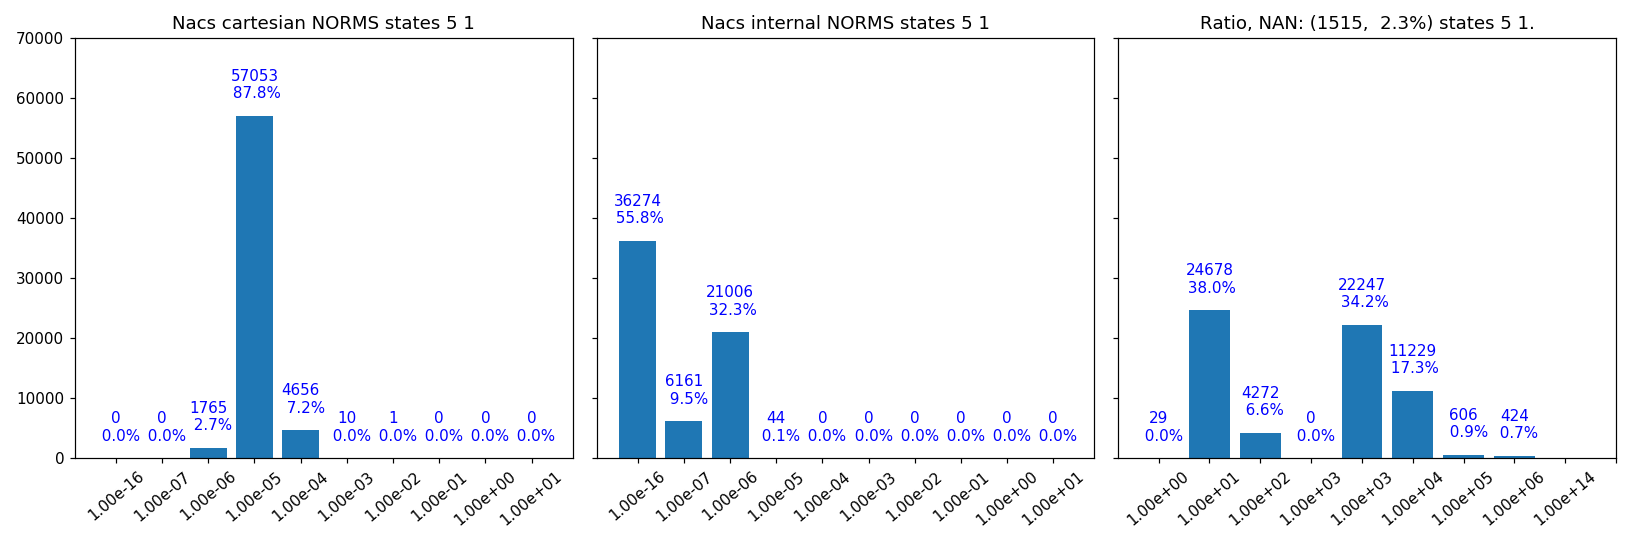

<IPython.core.display.Javascript object>


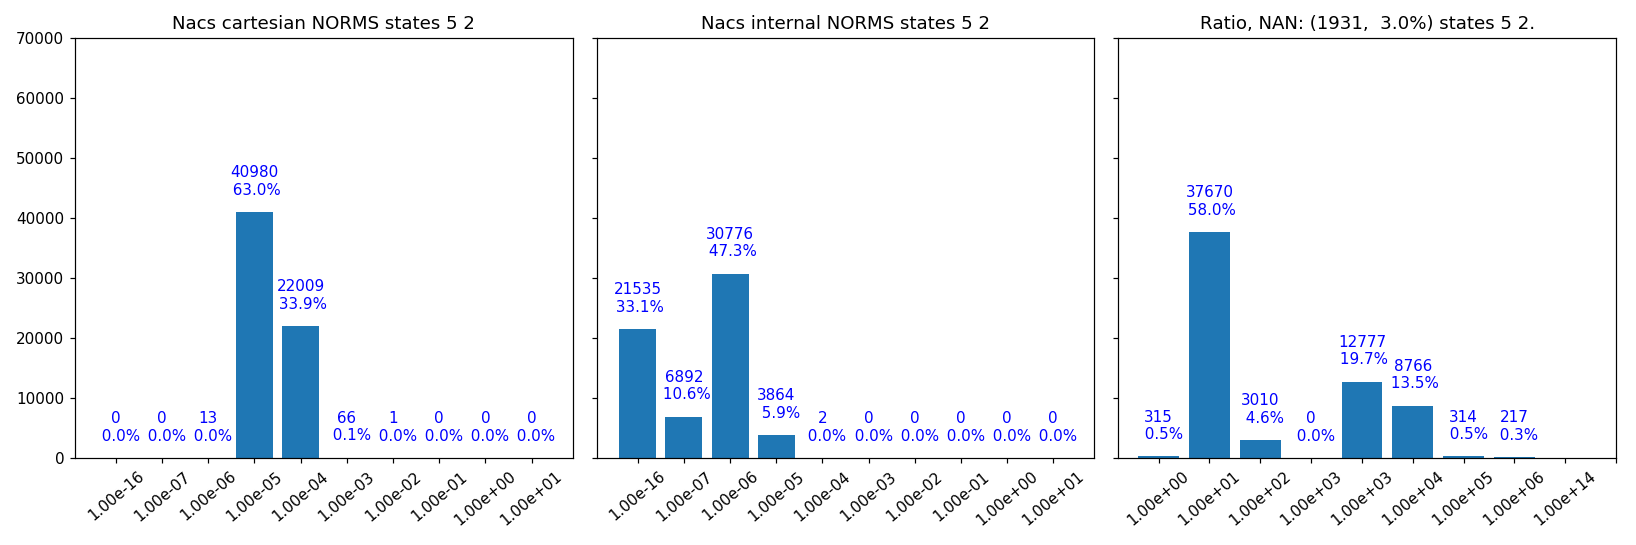

<IPython.core.display.Javascript object>


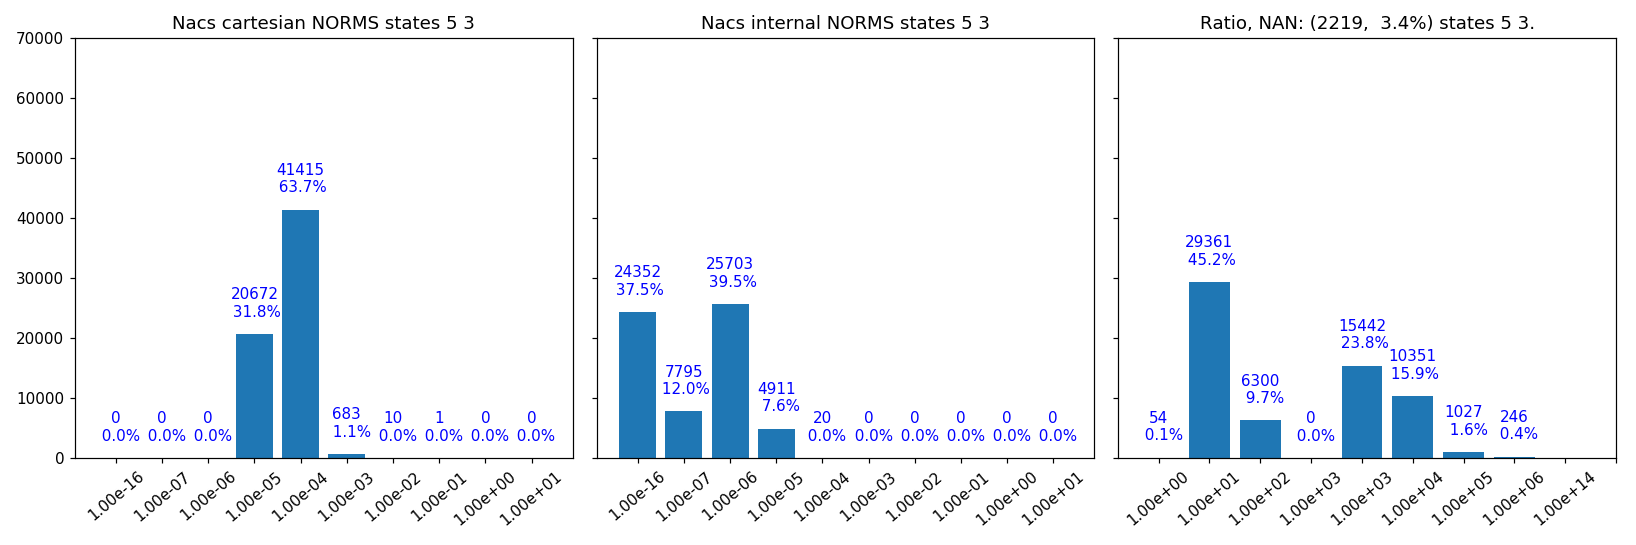

<IPython.core.display.Javascript object>


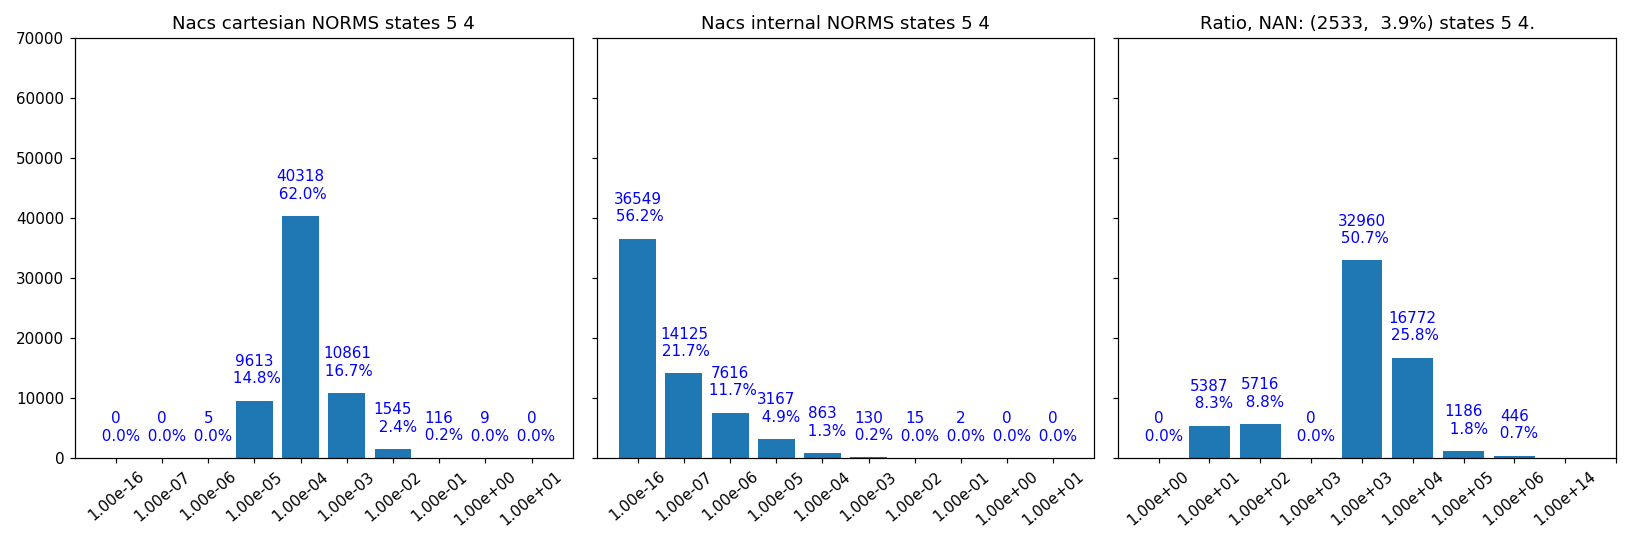

<IPython.core.display.Javascript object>


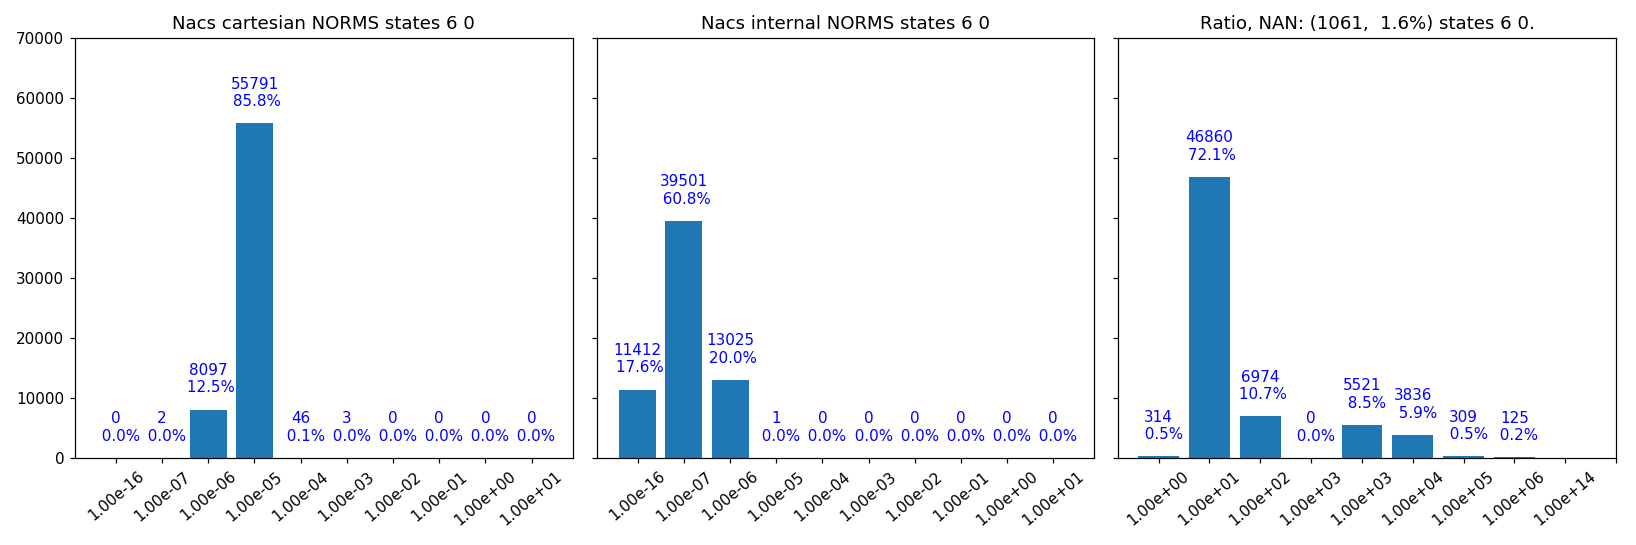

<IPython.core.display.Javascript object>


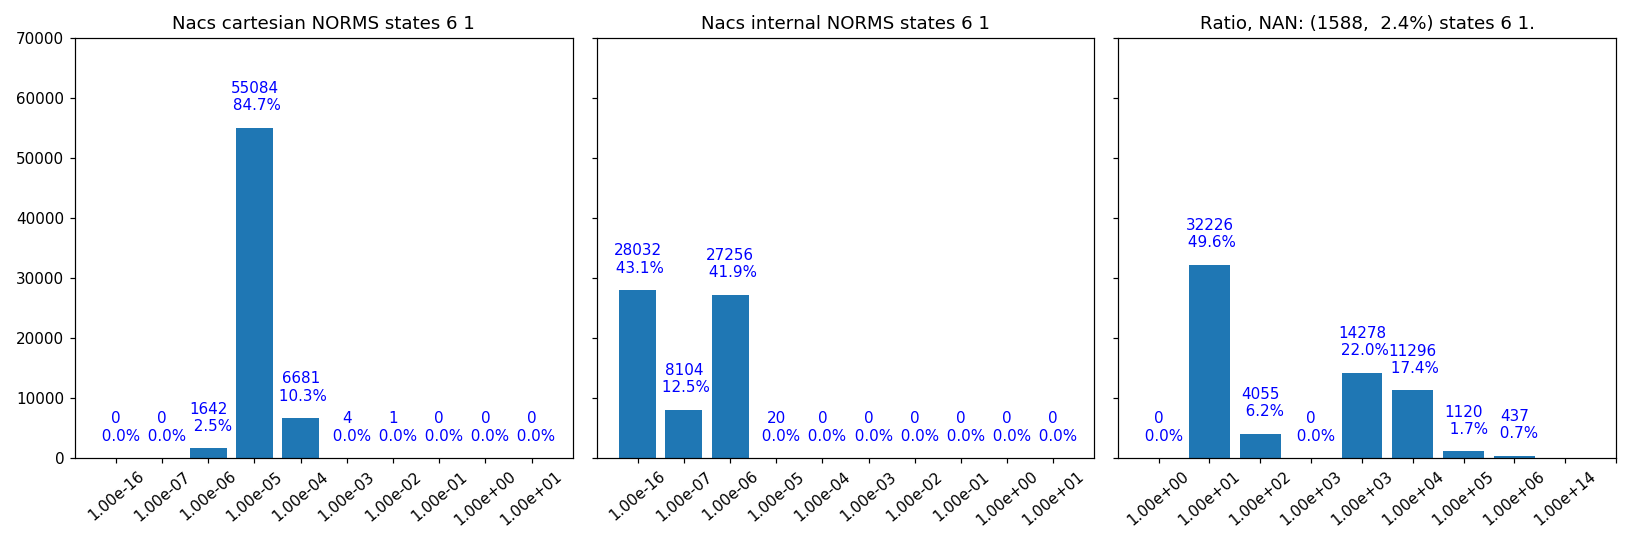

<IPython.core.display.Javascript object>


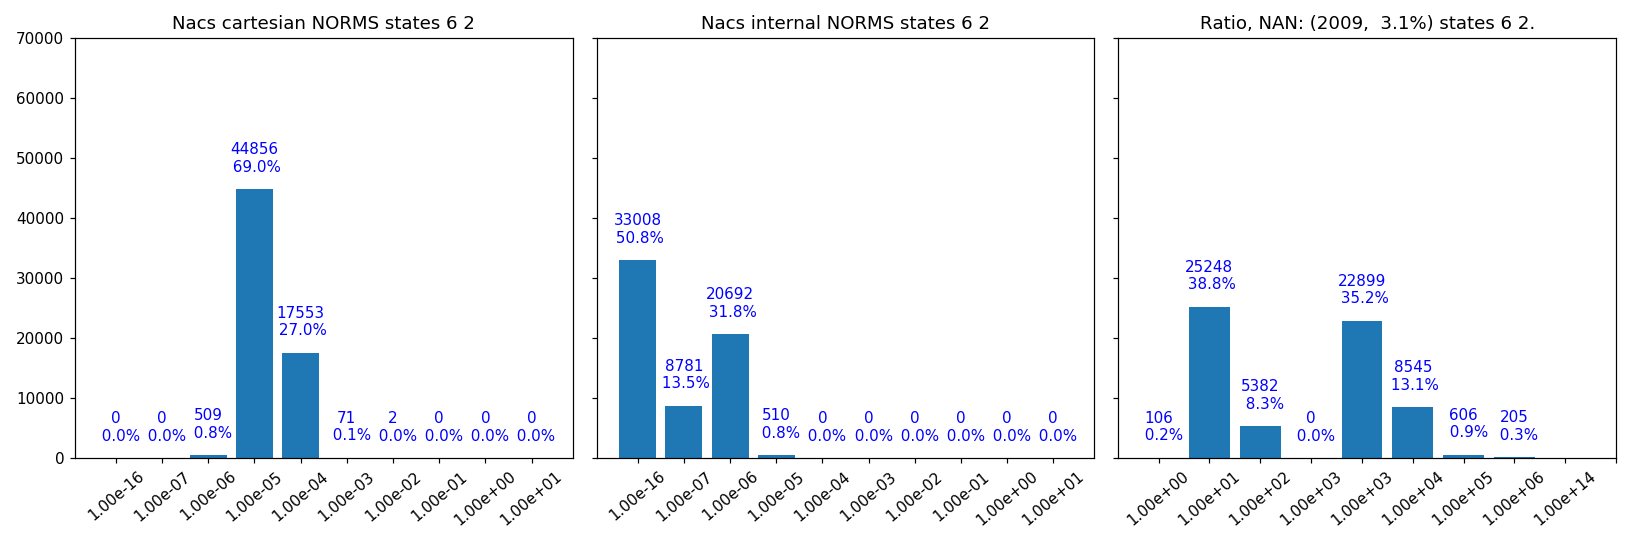

<IPython.core.display.Javascript object>


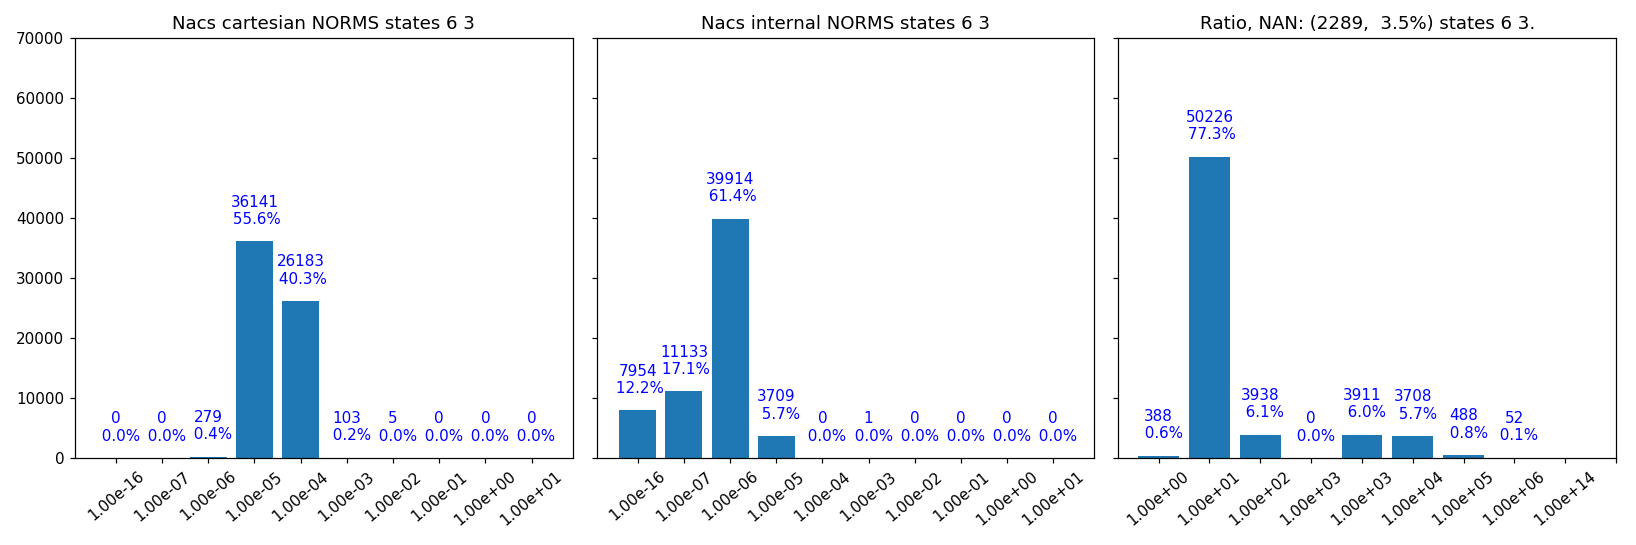

<IPython.core.display.Javascript object>


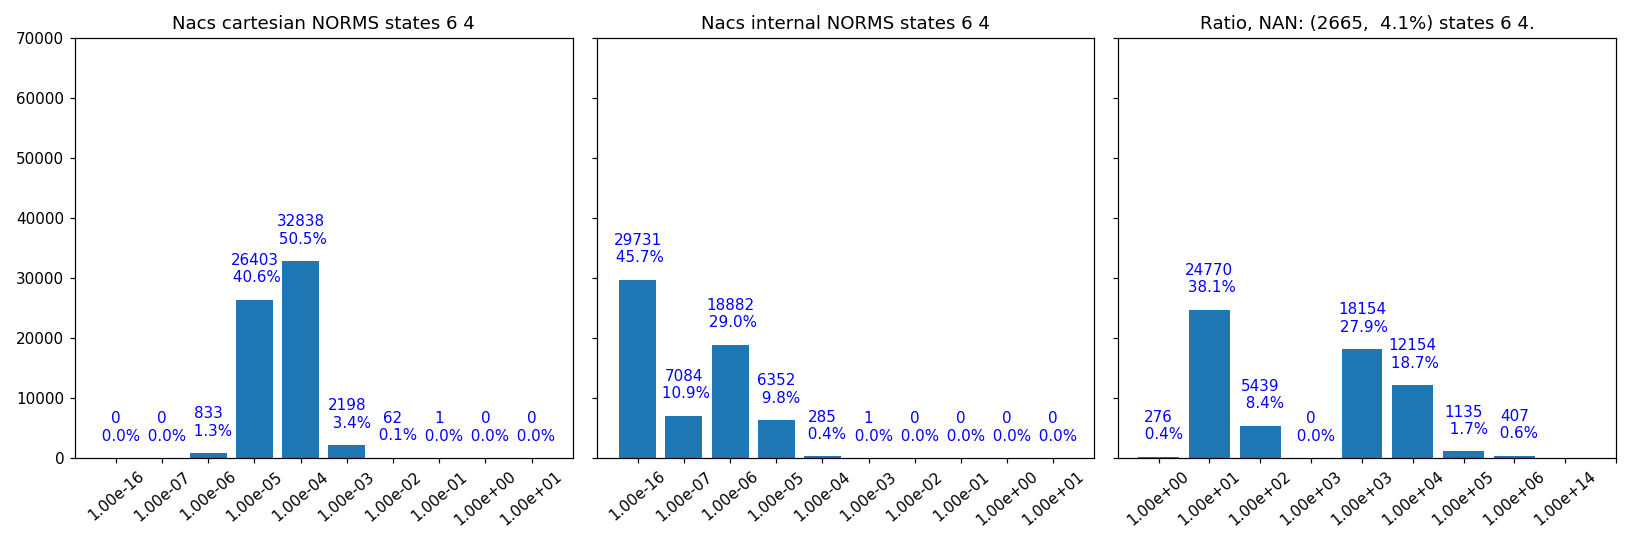

/home/alessio/config/miniconda/envs/quantumpropagator/lib/python3.5/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


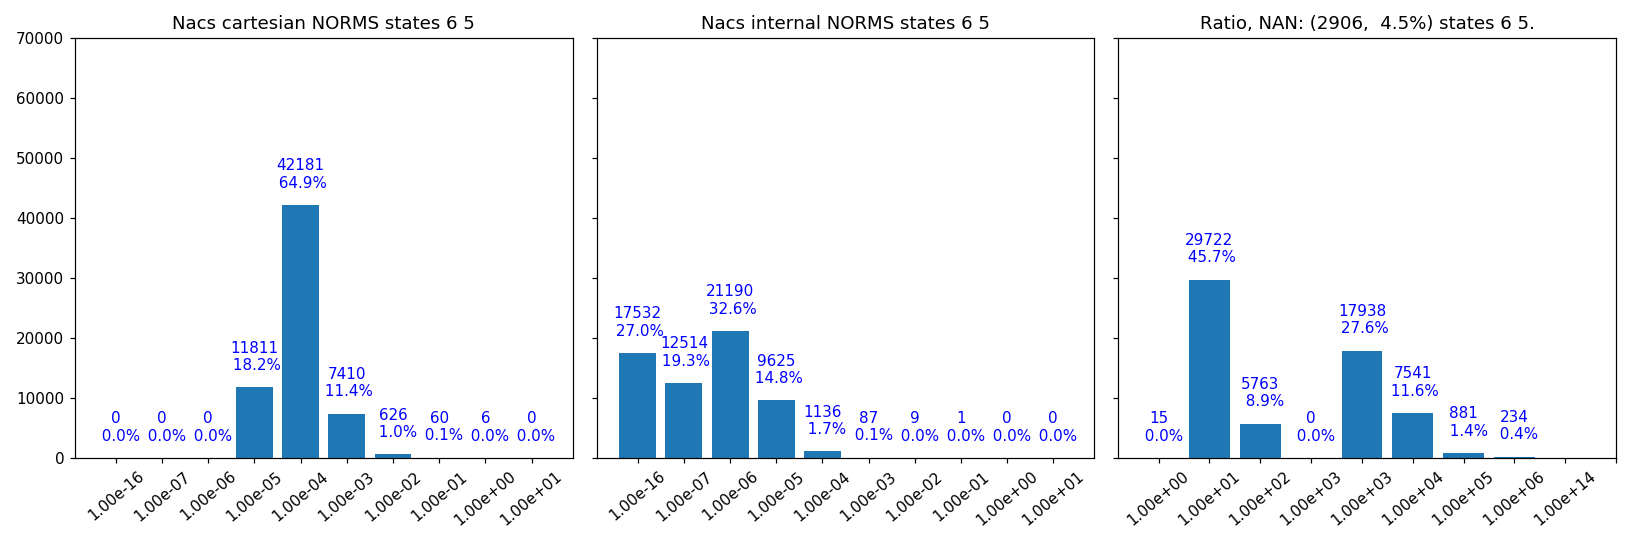

<IPython.core.display.Javascript object>


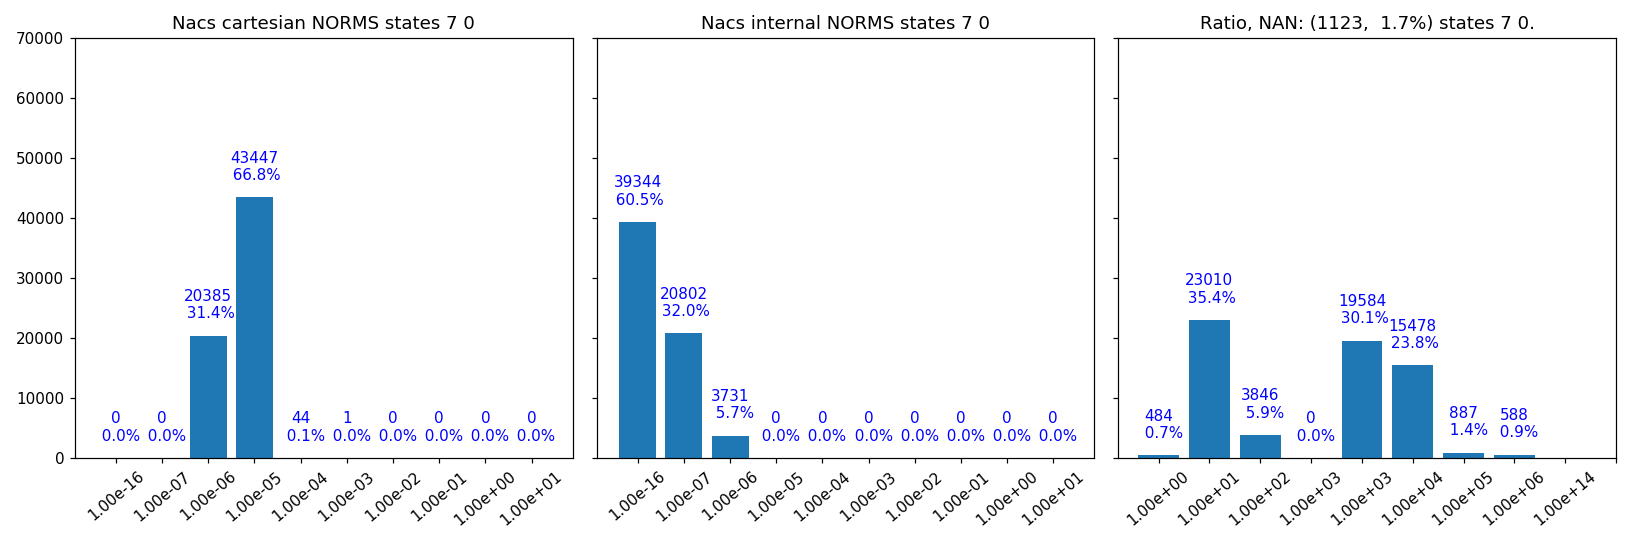

<IPython.core.display.Javascript object>


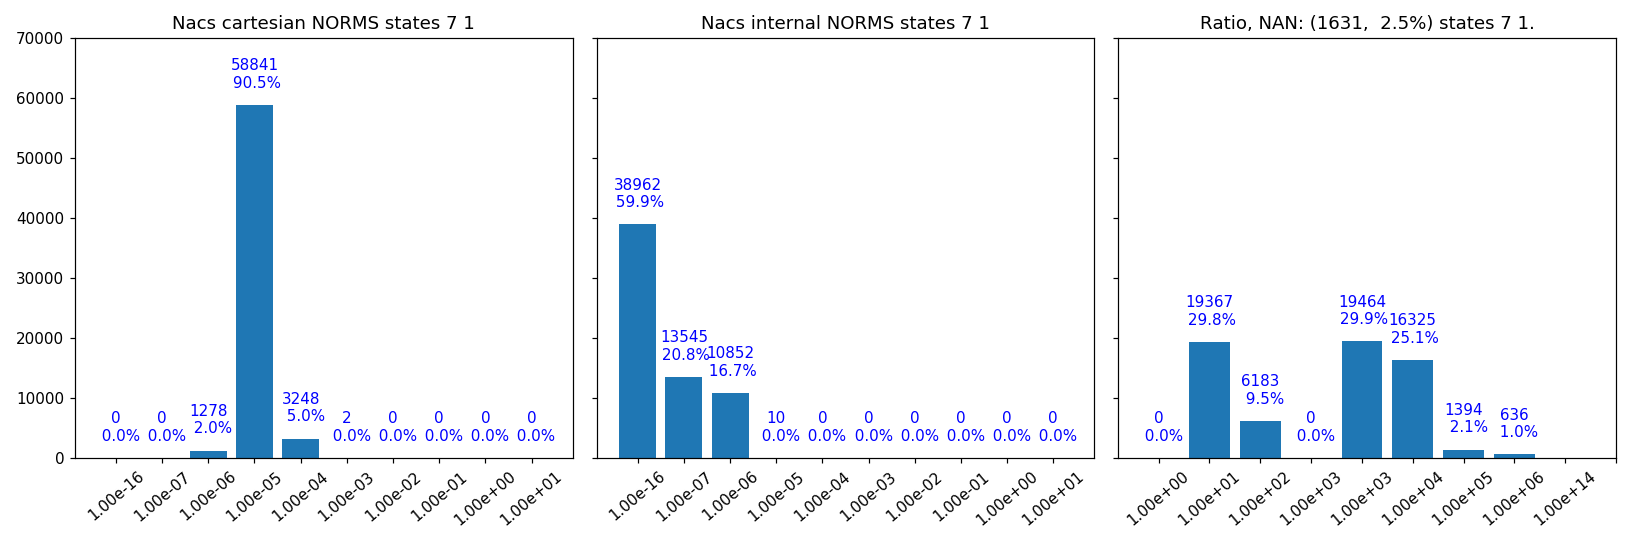

<IPython.core.display.Javascript object>


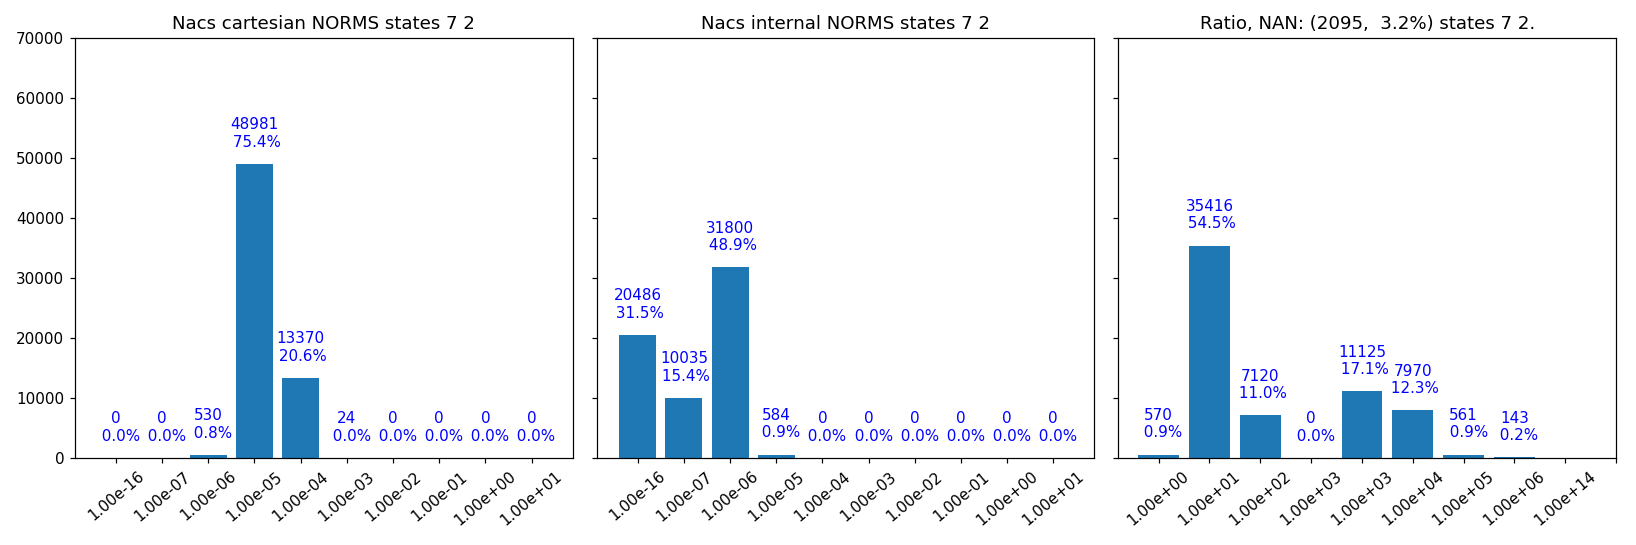

<IPython.core.display.Javascript object>


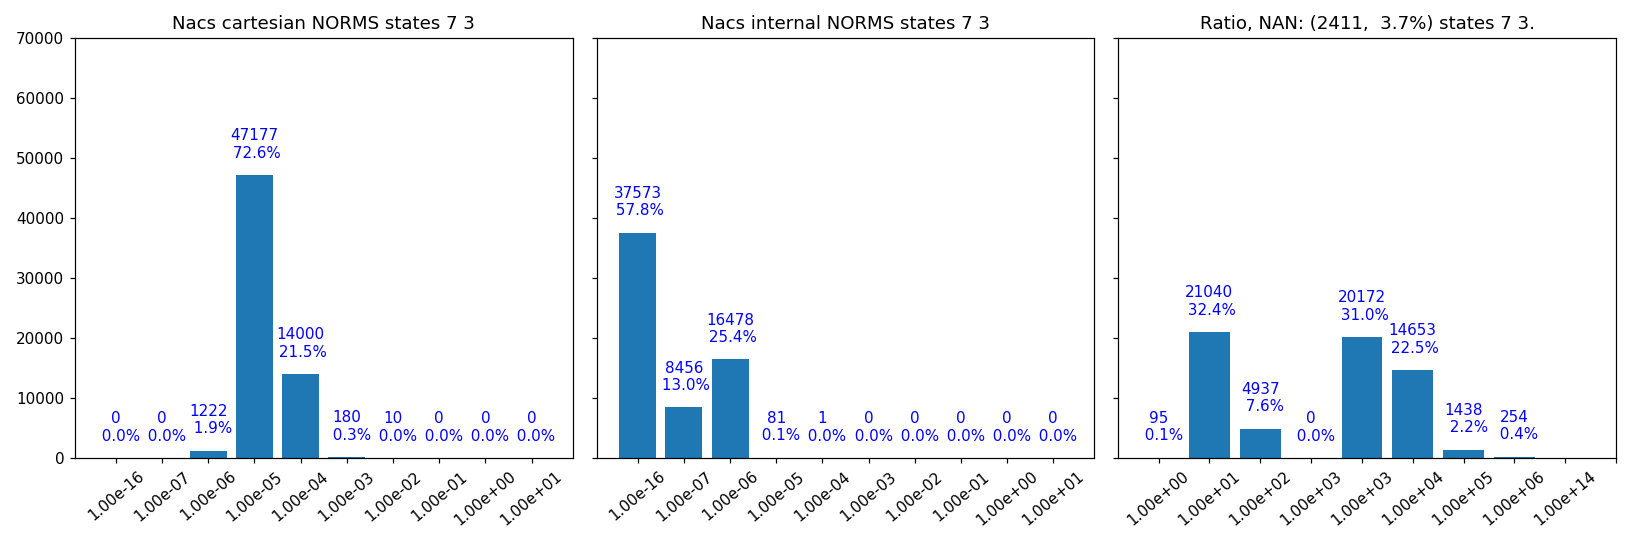

<IPython.core.display.Javascript object>


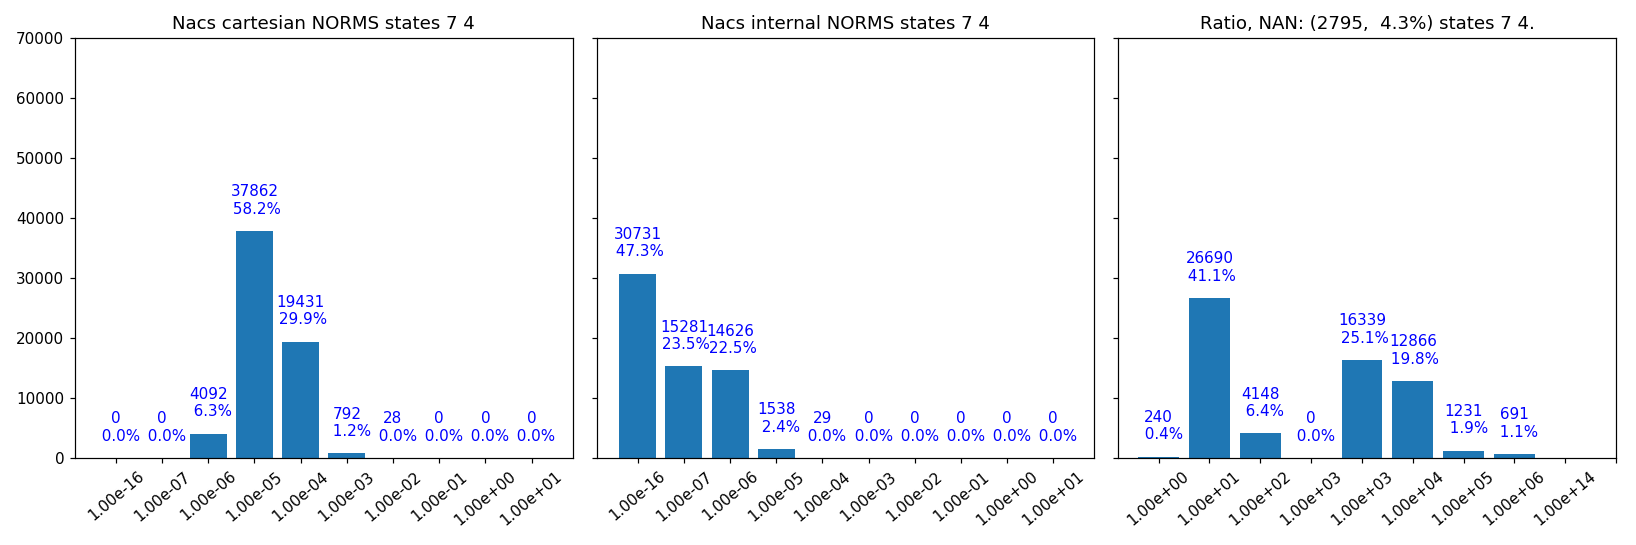

<IPython.core.display.Javascript object>


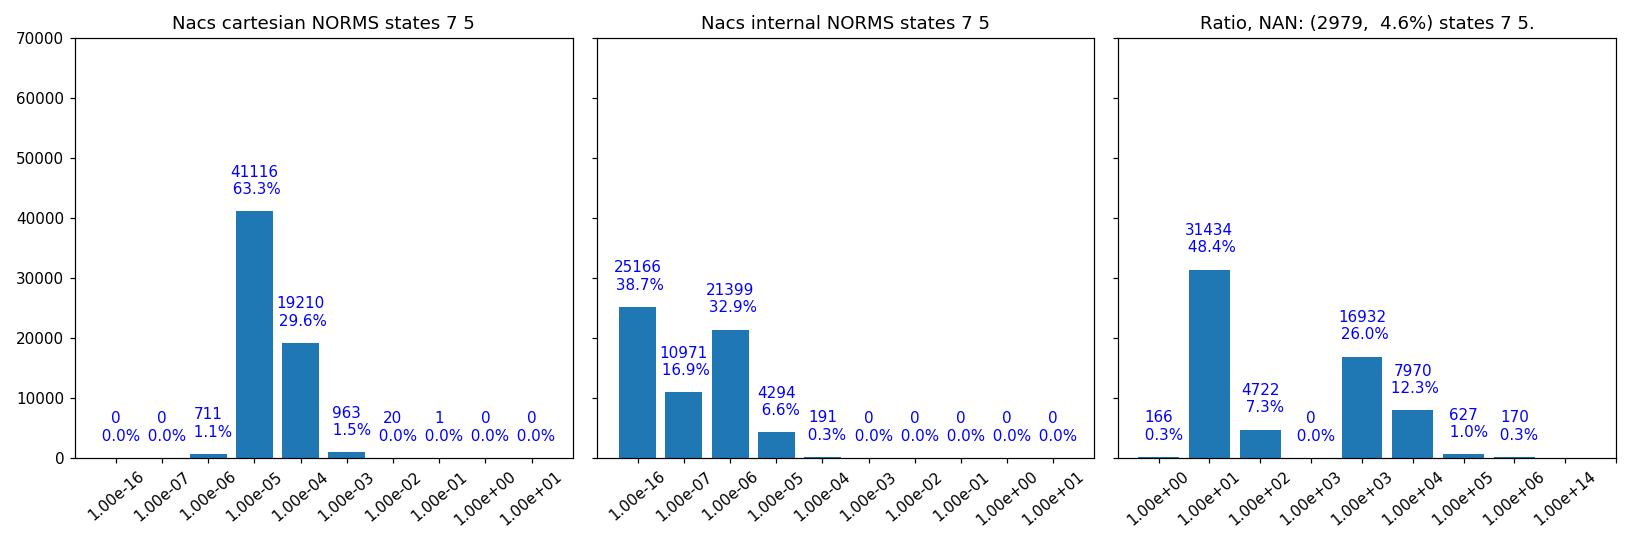

<IPython.core.display.Javascript object>


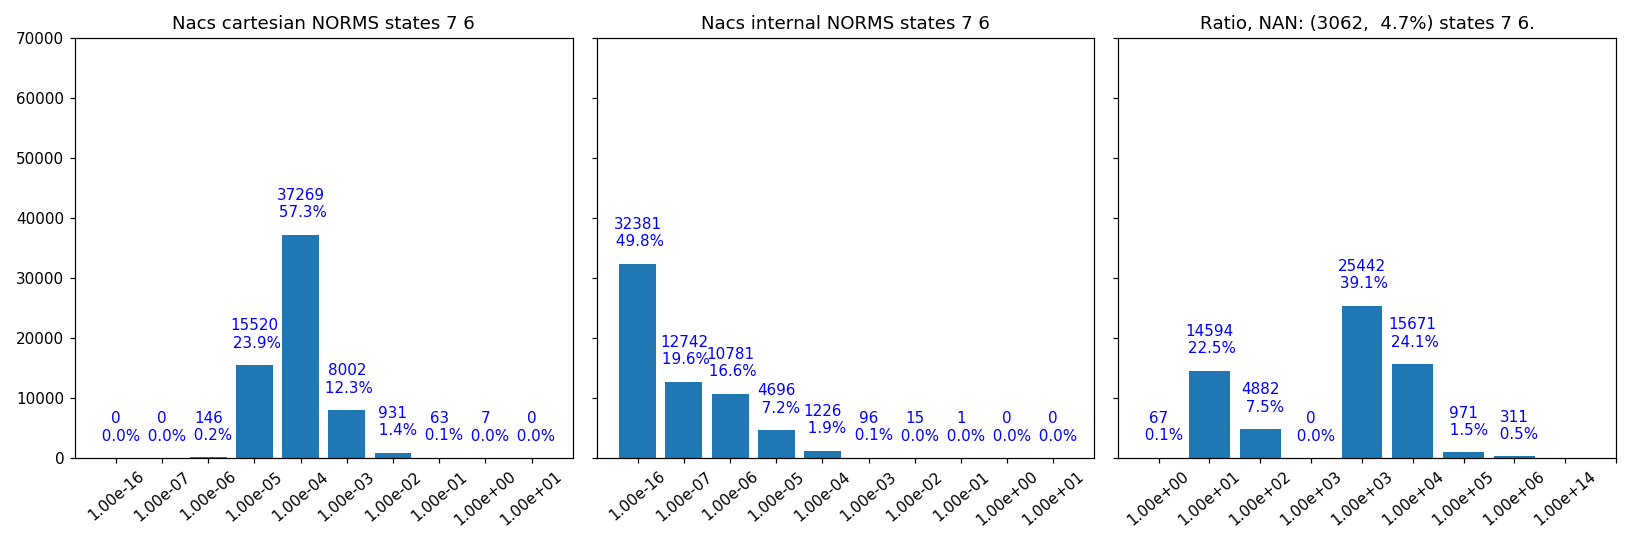

In [75]:
## then create a cube and a histogram for the RATIOS, how much we lose by pojecting cartesian to internal space
## then visualize the cube
## smooth and multiply


import matplotlib.pyplot as plt
%matplotlib notebook

states_to_plot = 8

norms_car = np.linalg.norm(nac_car,axis=(5,6))
norms_int = np.linalg.norm(nac_int,axis=5)

makeGraph = True

all_cubes = []

if makeGraph:
    for s1 in range(states_to_plot):
        for s2 in range(s1):
            
            # INTERNAL
            a = np.abs(norms_int[:,:,:,s1,s2].flatten())
            len_a = a.size
            
            # CARTESIAN
            b = np.abs(norms_car[:,:,:,s1,s2].flatten())
            len_b = b.size
            
            c2 = b/a
            
            how_many_zero = np.argwhere(np.isnan(c2)).size
            percent_how_many_nan = (how_many_zero/65000)*100
            
            c = np.nan_to_num(c2)
            len_c = c.size
            
            all_cubes.append(c2) # here I want the one with 
           
            binZ  = [0.0000000000000001, 0.0000001, 0.000001, 0.00001,0.0001,0.001,0.01,0.1,1.0,10,1000000000] # last one is not displayed
            binZ2 = [1, 10, 100, 1000,1000,10000,100000,1000000,100000000000000] # last one is not displayed
            
            # thing here is the integer where I plot the bar (x position)
            thing = np.arange(len(binZ)-1)
            label_names  = [ '{:5.2e}'.format(x) for x in binZ ]
            
            thing2 = np.arange(len(binZ2)-1)
            label_names2 = [ '{:5.2e}'.format(x) for x in binZ2 ]
            
            counts_a, bins_a = np.histogram(a,bins=binZ)
            counts_b, bins_b = np.histogram(b,bins=binZ)
            counts_c, bins_c = np.histogram(c,bins=binZ2)

            fig, [ax1,ax0,ax2] = plt.subplots(1,3,figsize=(15,5),sharey=True)
            
            ax0.bar(thing,counts_a)
            ax1.bar(thing,counts_b)
            ax2.bar(thing2,counts_c)
     
            for xy in zip(thing, counts_a):
                percentage = (xy[1]/len_a)*100
                ax0.annotate('{}\n{:5.1f}%\n'.format(xy[1],percentage), xy=xy, color='blue', ha='center')
            for xy in zip(thing, counts_b):
                percentage = (xy[1]/len_b)*100
                ax1.annotate('{}\n{:5.1f}%\n'.format(xy[1],percentage), xy=xy, color='blue', ha='center')
            for xy in zip(thing, counts_c):
                percentage = (xy[1]/len_c)*100
                ax2.annotate('{}\n{:5.1f}%\n'.format(xy[1],percentage), xy=xy, color='blue', ha='center')

            y_lim_up = 70000

            ax0.set_xticks(thing, minor=False)
            ax0.set_xticklabels(label_names, fontdict=None, minor=False,rotation=40)
            ax0.set_title('Nacs internal NORMS states {} {}'.format(s1,s2))
            ax0.set_ylim(0,y_lim_up)
            
            ax1.set_xticks(thing, minor=False)
            ax1.set_xticklabels(label_names, fontdict=None, minor=False,rotation=40)
            ax1.set_title('Nacs cartesian NORMS states {} {}'.format(s1,s2))
            ax1.set_ylim(0,y_lim_up)
            
            ax2.set_xticks(thing, minor=False)
            ax2.set_xticklabels(label_names2, fontdict=None, minor=False,rotation=40)
            ax2.set_title('Ratio, NAN: ({},{:5.1f}%) states {} {}.'.format(how_many_zero,percent_how_many_nan,s1,s2))
            ax2.set_ylim(0,y_lim_up)
            
            plt.tight_layout()


What is the average scalar product in 24 dimensions of a random normal distribution with respect to one fixed vector.

In [56]:
def giveme(a):
    vector = np.random.normal(size=(8,3))
    norm_vector = np.linalg.norm(vector)
    normalized = vector/norm_vector
    return(np.dot(a.flatten(),normalized.flatten()))


fn = '/home/alessio/Desktop/a-3dScanSashaSupport/b-BranchingCI/DerCoup'

a=np.loadtxt(fn)

average = np.average(np.abs([ giveme(a[7:]) for i in range(50000) ]))  # 50K is good enough

print(average)

0.164533140578


In [76]:
def savecubes(cube):
    return all_cubes[0].reshape(25,26,100)


savecubes(all_cubes)

array([[[  5.71571699e+01,   5.97745490e+01,   6.21476613e+01, ...,
           2.28866442e+01,   2.22857221e+01,   2.16810753e+01],
        [  5.95841671e+01,   6.21166339e+01,   6.47516570e+01, ...,
           2.15938657e+01,   2.10559457e+01,   2.05845244e+01],
        [  6.17006481e+01,   6.44781212e+01,   6.73843383e+01, ...,
           2.02949488e+01,   1.98799716e+01,   1.94882436e+01],
        ..., 
        [  4.35568558e+01,   4.34395908e+01,   4.33544523e+01, ...,
           1.65549438e+01,   1.59654255e+01,   1.54138131e+01],
        [  3.36833461e+03,   1.82230074e+03,   3.94470925e+01, ...,
           1.72197799e+01,   1.66160609e+01,   1.60509503e+01],
        [  1.05642425e+04,   9.85294073e+03,   9.16162115e+03, ...,
           1.78864350e+01,   1.72764703e+01,   1.67000230e+01]],

       [[  4.90190907e+01,   5.05606937e+01,   5.21105926e+01, ...,
           2.89405736e+01,   2.77048300e+01,   2.66743903e+01],
        [  5.08381889e+01,   5.25619296e+01,   5.43037511e+0